# Riskfolio-Lib Tutorial: 
<br><a href="https://www.kqzyfj.com/click-101359873-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
        <button style="padding:10px 20px; font-size:16px; background-color: #FFA500; color:white; border:none; border-radius:5px; cursor:pointer;">
            Buy Advanced Portfolio Optimization Book on Springer
        </button>
    </a>
<br>
<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Tutorial 22: Logarithmic Mean Risk Optimization (Kelly Criterion)

## 1. Downloading the data:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2000-01-01'
end = '2019-12-31'

# Tickers of assets
assets = ['AIG', 'AKAM', 'AMT', 'APA', 'BA', 'BAX', 'BKNG',
          'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'MO', 'MSFT', 'NI',
          'NKTR', 'NTAP', 'PCAR', 'PSA', 'REGN', 'SBAC', 'SEE', 'T',
          'TGT', 'TMO', 'TTWO']

assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  26 of 26 completed


In [3]:
# Calculating returns

#Y = data[assets].pct_change().dropna()
Y = data[assets].copy()
Y = Y.resample('M').last().pct_change().dropna()
print(Y.shape)
display(Y.head())

(239, 26)


,AIG,AKAM,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,CNP,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-29,-15.2695%,4.8670%,37.2823%,0.0000%,-16.7100%,-14.6772%,-3.5560%,-13.5849%,-7.2464%,-8.3352%,...,88.0448%,4.6442%,-2.7548%,358.8832%,33.6083%,-11.4699%,-11.9533%,-10.2961%,-9.7473%,0.0000%
2000-03-31,23.8864%,-38.4450%,0.2538%,36.5170%,2.3689%,15.0229%,43.0168%,-0.2183%,3.1250%,14.5896%,...,-12.3179%,16.1105%,-3.8081%,-47.6770%,8.6419%,9.3082%,11.5894%,26.6949%,30.4000%,6.5327%
2000-04-30,0.1712%,-38.5154%,-5.6962%,-2.6382%,4.9586%,8.5879%,-20.9375%,-7.8650%,-5.4545%,12.9974%,...,-10.6496%,-4.8751%,6.5476%,-3.3827%,-7.6704%,2.4165%,4.7667%,-10.9532%,-4.9080%,-27.3585%
2000-05-31,2.6662%,-32.4905%,-20.2684%,25.6130%,-1.2137%,2.1113%,-39.7233%,5.0060%,-3.6859%,8.7704%,...,-12.6796%,-11.3612%,-0.2794%,-28.6652%,-8.3077%,0.6742%,-0.2853%,-5.6896%,-4.1935%,-5.8442%
2000-06-30,4.3865%,77.8792%,12.2895%,-3.3385%,7.0400%,5.7331%,-0.3688%,5.7889%,3.4941%,3.5011%,...,24.6854%,-5.2239%,6.1300%,46.3190%,39.4295%,-6.4732%,0.7153%,-7.4776%,13.4679%,33.7931%


## 2. Estimating Logarithmic Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [5]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

port.solvers = ['MOSEK']
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0000%,0.0000%
AMT,0.0000%,0.0001%,0.0000%
APA,0.0000%,0.0000%,0.0000%
BA,1.4588%,1.4078%,1.3887%
BAX,1.3214%,1.8791%,1.8891%
BKNG,2.6984%,2.5498%,2.5603%
BMY,0.0000%,0.0792%,0.1514%
CMCSA,0.0000%,0.0000%,0.0000%
CNP,0.0000%,0.3561%,0.4178%


<Axes: >

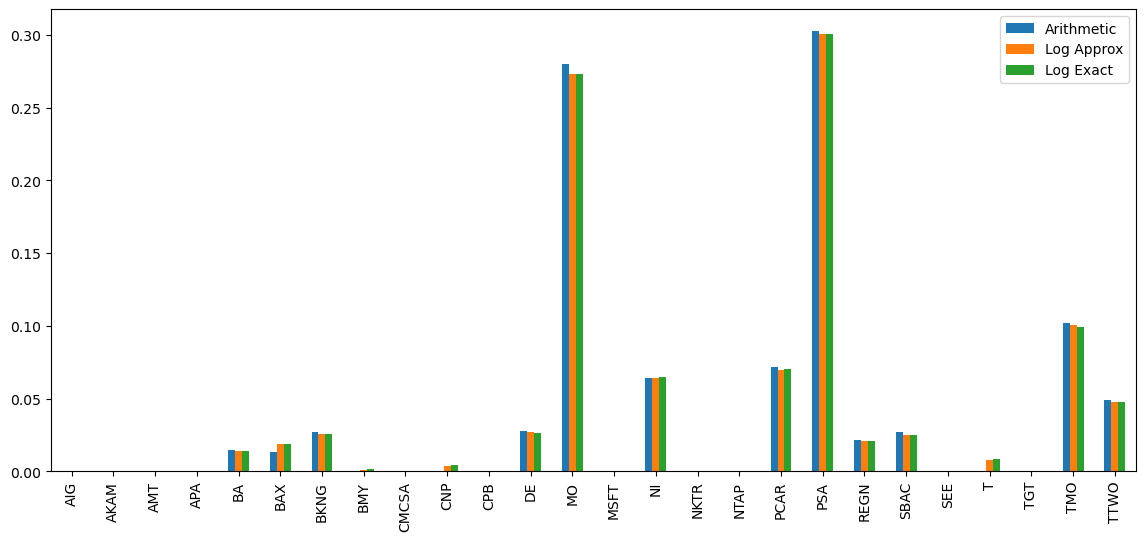

In [6]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [7]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rp.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12**0.5)

Risk Adjusted Return:
Arithmetic 1.2708633284065216
Log Approx 1.271277509792363
Log Exact 1.2712853994711972


### 2.2 Calculate efficient frontier

In [9]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,CNP,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.0000%,0.0000%,0.9732%,0.0000%,6.5649%,0.0000%,8.8956%,4.2389%,4.6817%,...,0.0000%,0.0047%,21.9645%,0.9348%,0.0000%,0.0000%,8.7338%,2.6977%,1.2639%,1.9033%
1,0.0000%,0.0000%,0.0000%,0.0000%,0.4694%,4.2742%,1.5116%,4.3741%,0.0000%,2.8896%,...,0.0000%,4.8768%,27.7611%,1.6011%,0.9927%,0.0000%,4.9223%,0.0310%,7.6685%,3.8109%
2,0.0000%,0.0000%,0.0000%,0.0000%,1.0669%,2.6833%,2.3190%,1.5048%,0.0000%,1.1507%,...,0.0000%,6.5123%,29.6692%,1.9032%,2.1296%,0.0000%,2.3494%,0.0000%,9.6204%,4.5798%
3,0.0000%,0.0000%,0.0000%,0.0000%,1.1690%,0.0000%,3.1125%,0.0000%,0.0000%,0.0000%,...,0.0000%,7.3735%,30.3568%,2.4822%,3.3581%,0.0000%,0.0000%,0.0000%,9.7291%,5.7723%
4,0.0000%,0.0000%,0.0000%,0.0000%,0.0269%,0.0000%,3.9908%,0.0000%,0.0000%,0.0000%,...,0.0000%,7.5013%,30.0451%,3.1738%,4.7584%,0.0000%,0.0000%,0.0000%,8.3937%,7.7205%


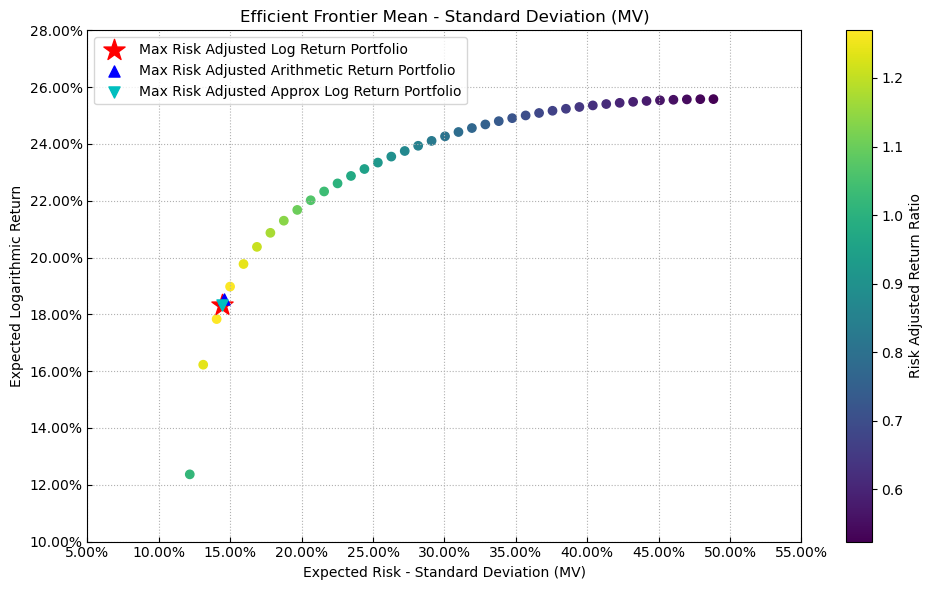

In [10]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
rp.plot_frontier(w_frontier=frontier,
                 mu=mu,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 kelly=True,
                 rf=rf,
                 alpha=0.05,
                 cmap='viridis',
                 w=w_3,
                 label=label,
                 marker='*',
                 s=16,
                 c='r',
                 height=6,
                 width=10,
                 t_factor=12,
                 ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 12 
x1 = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 12 
x2 = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()

## 2. Estimating Logarithmic Mean EVaR Portfolios

### 2.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [12]:
rm = 'EVaR' # Risk measure

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0000%,0.0000%
AMT,0.0000%,0.0000%,0.0000%
APA,6.6632%,3.0801%,3.4319%
BA,0.0000%,0.0000%,0.0000%
BAX,6.0537%,2.2601%,2.3704%
BKNG,6.9015%,5.0120%,5.1704%
BMY,4.7030%,6.7796%,6.8632%
CMCSA,0.0000%,0.0000%,0.0000%
CNP,0.0844%,2.9095%,2.7665%


<Axes: >

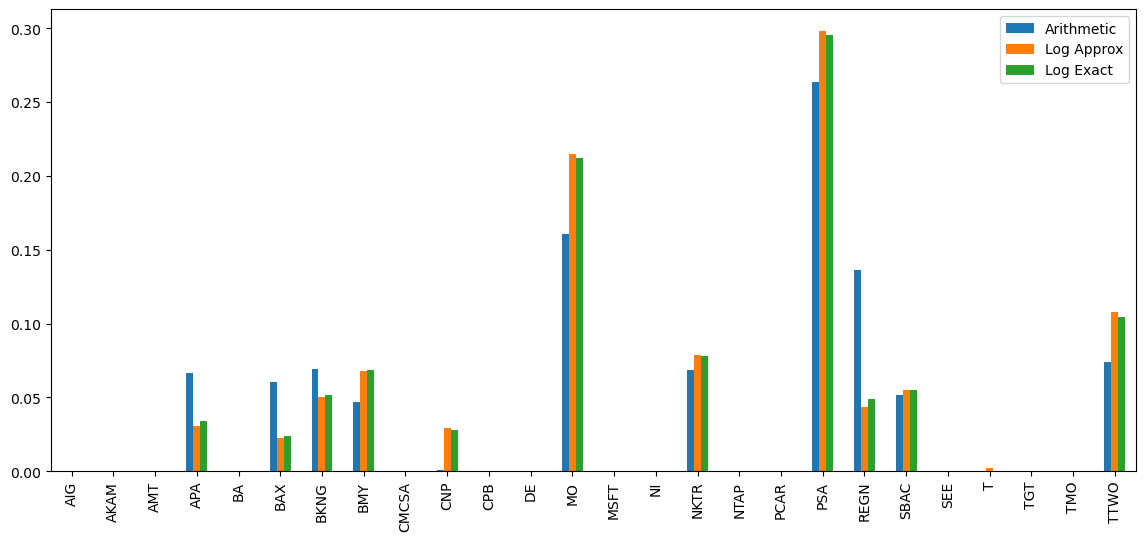

In [13]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [14]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rp.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12**0.5)

Risk Adjusted Return:
Arithmetic 0.6328895917031077
Log Approx 0.646264410360255
Log Exact 0.6463392695478154


### 3.2 Calculate efficient frontier

In [16]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,CNP,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,2.8287%,2.3020%,18.2686%,0.0000%,1.9355%,...,0.0000%,0.0000%,17.2219%,0.0000%,5.2723%,0.0000%,6.7947%,0.0000%,7.5239%,8.0870%
1,0.0000%,0.0000%,0.0000%,3.4480%,0.0000%,3.8679%,3.1557%,11.5998%,0.0000%,3.8139%,...,0.0000%,0.0000%,25.3001%,0.0000%,7.1302%,0.0000%,4.4124%,0.0000%,0.0000%,11.6057%
2,0.0000%,0.0000%,0.0000%,4.2820%,0.0000%,2.8146%,3.7346%,10.1901%,0.0000%,3.6608%,...,0.0000%,0.0000%,27.5502%,1.1712%,6.6494%,0.0000%,1.7242%,0.0000%,0.0000%,11.3770%
3,0.0000%,0.0000%,0.0000%,3.9387%,0.0000%,2.7741%,4.6238%,7.9820%,0.0000%,3.0593%,...,0.0000%,0.0000%,28.6374%,3.6377%,5.8159%,0.0000%,0.7739%,0.0000%,0.0000%,10.7413%
4,0.0000%,0.0000%,0.0000%,3.0460%,0.0000%,2.2112%,5.3233%,6.0734%,0.0000%,2.5929%,...,0.0000%,0.0000%,29.9376%,5.5013%,5.3980%,0.0000%,0.0000%,0.0000%,0.0000%,10.4707%


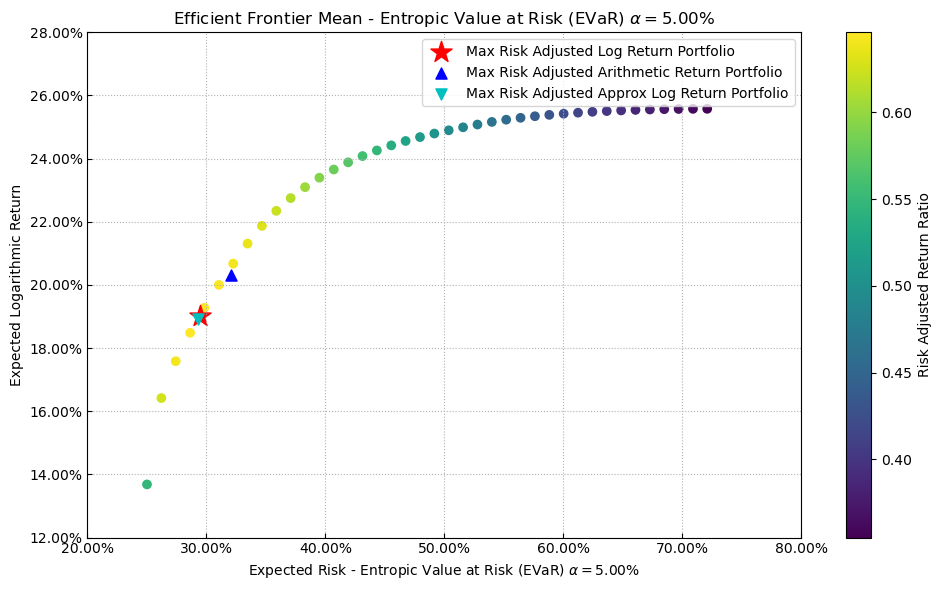

In [17]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
rp.plot_frontier(w_frontier=frontier,
                 mu=mu,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 kelly=True,
                 rf=rf,
                 alpha=0.05,
                 cmap='viridis',
                 w=w_3,
                 label=label,
                 marker='*',
                 s=16,
                 c='r',
                 height=6,
                 width=10,
                 t_factor=12,
                 ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 12
x1 = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 12
x2 = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()

## 3. Estimating Logarithmic Mean EDaR Portfolios

### 3.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [19]:
rm = 'EDaR' # Risk measure

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0000%,0.0000%
AMT,2.8669%,0.3719%,0.5224%
APA,0.0000%,0.0000%,0.0000%
BA,0.0000%,0.0000%,0.0000%
BAX,0.0000%,0.0000%,0.0000%
BKNG,3.0492%,1.4544%,1.6956%
BMY,0.0000%,0.0000%,0.0000%
CMCSA,0.0000%,0.0000%,0.0000%
CNP,0.0000%,0.0000%,0.0000%


<Axes: >

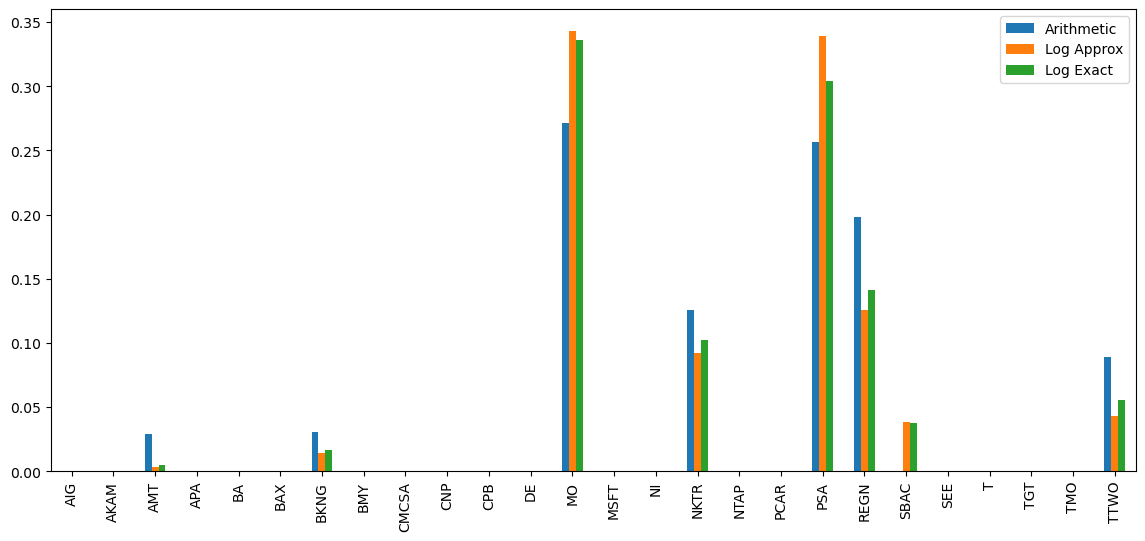

In [20]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [21]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rp.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12)

Risk Adjusted Return:
Arithmetic 0.8286208015351624
Log Approx 0.8435804152316564
Log Exact 0.8449872652743937


### 3.2 Calculate efficient frontier

In [23]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,CNP,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.0000%,1.9630%,5.5773%,0.0000%,0.0000%,1.9599%,2.3312%,0.0000%,0.0000%,...,0.0000%,0.0000%,23.2474%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,2.5704%,3.6697%,0.0000%,0.0000%,0.9192%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,31.4908%,5.8685%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,3.2750%,1.2159%,0.0000%,0.0000%,0.3203%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,36.5054%,8.0957%,0.4379%,0.0000%,0.0000%,0.0000%,0.0000%,0.7604%
3,0.0000%,0.0000%,1.6926%,0.0000%,0.0000%,0.0000%,1.2423%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,34.9683%,12.1345%,2.4519%,0.0000%,0.0000%,0.0000%,0.0000%,3.5031%
4,0.0000%,0.0000%,0.8849%,0.0000%,0.0000%,0.0000%,1.8560%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,27.4039%,15.3671%,3.4524%,0.0000%,0.0000%,0.0000%,0.0000%,6.5587%


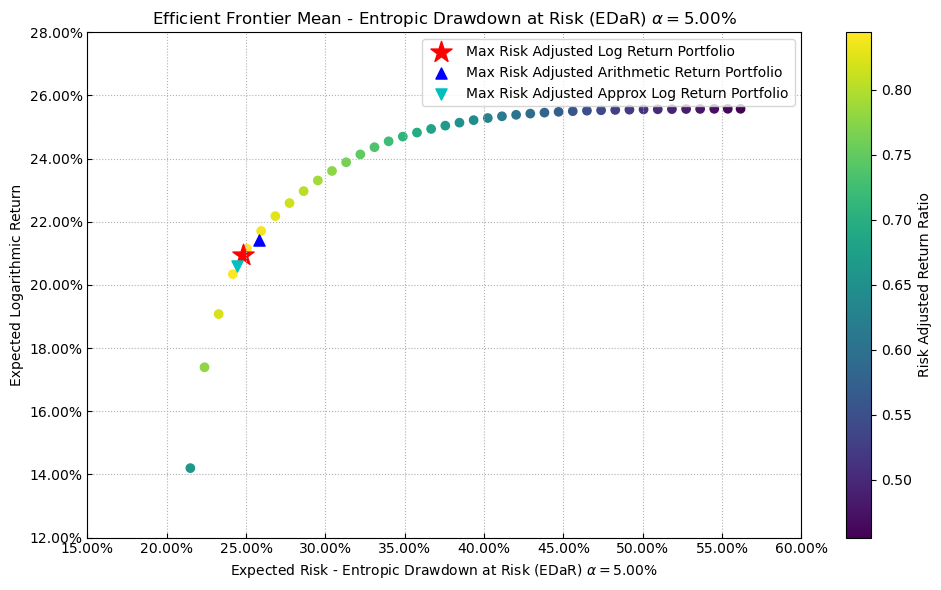

In [24]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
rp.plot_frontier(w_frontier=frontier,
                 mu=mu,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 kelly=True,
                 rf=rf,
                 alpha=0.05,
                 cmap='viridis',
                 w=w_3,
                 label=label,
                 marker='*',
                 s=16,
                 c='r',
                 height=6,
                 width=10,
                 t_factor=12,
                 ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 12
x1 = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 12
x2 = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()